In [1]:
!pip install SimpleITK

You should consider upgrading via the 'C:\Users\envy\Desktop\Prostate_MRI\Prostate_Lesion\packages\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
import pandas as pd
import nibabel as nib
import SimpleITK

In [21]:
HOME_DIR =       "./"
DATA_DIR =       "./PROSTATEx_masks/Files/lesions/"
OUT_DIR =        "./results/lesion/"
SLICED_OUT_DIR = "./data/sliced/"
AUG_OUT_DIR = "./data/augmented/"

In [4]:
df = pd.read_csv(DATA_DIR +'image_list.csv')

In [5]:
df.head()

,ADC,T2
0,ProstateX-0000_ep2d_diff_tra_7,ProstateX-0000_t2_tse_tra_4
1,ProstateX-0001_ep2d_diff_tra_8,ProstateX-0001_t2_tse_tra_10
2,ProstateX-0002_ep2d_diff_tra_7,ProstateX-0002_t2_tse_tra_4
3,ProstateX-0003_ep2d_diff_tra_6,ProstateX-0003_t2_tse_tra_3
4,ProstateX-0004_ep2d_diff_tra_7,ProstateX-0004_t2_tse_tra_5


In [6]:
import os
if not os.path.exists(SLICED_OUT_DIR + "images/"):
    os.makedirs(SLICED_OUT_DIR + "images/")
if not os.path.exists(SLICED_OUT_DIR + "prostates/"):
    os.makedirs(SLICED_OUT_DIR + "prostates/")
if not os.path.exists(SLICED_OUT_DIR + "pz_masks/"):
    os.makedirs(SLICED_OUT_DIR + "pz_masks/")
if not os.path.exists(SLICED_OUT_DIR + "tz_masks/"):
    os.makedirs(SLICED_OUT_DIR + "tz_masks/")
if not os.path.exists(SLICED_OUT_DIR + "labels/"):
    os.makedirs(SLICED_OUT_DIR + "labels/")

In [7]:
data = []
for index, row in df.iterrows():
    value = row['T2'].split("-")
    numb= value[1].split("_")[0]
    if int(numb) == 128:
        t2 = DATA_DIR+'Images/T2/'+row['T2']+'.nii'
    else:
        t2 = DATA_DIR+'Images/T2/'+row['T2']+'.nii.gz'
    if int(numb) == 25:
        adc = DATA_DIR+'Images/ADC/'+row['ADC']+'a.nii.gz'
    elif int(numb) == 113:
        value = row['ADC'][:-2]+'9'
        adc = DATA_DIR+'Images/ADC/'+value+'.nii.gz'
    elif int(numb) == 203:
        adc = DATA_DIR+'Images/ADC/'+'ProstateX-0203_diffusie-3ProstateX-0203_diffusie-3Scan-4bval_fs_7.niiScan-4bval_fs_7.nii.gz'
    else:
        adc = DATA_DIR+'Images/ADC/'+row['ADC']+'.nii.gz'
   
    data.append({ 'T2': t2, 'ADC': adc , 'name': value[0] + '_' +str(numb)})

In [8]:
import nibabel as nib
import json
import numpy as np

def load_nifti(image_nifty_file, label_nifty_file):
    # load the image and label file, get the image content and return a numpy array for each
    image = nib.load(image_nifty_file)
    label = nib.load(label_nifty_file)
    
    return image, label

def save_to_json(data, path):
  with open(path, 'w') as fp:
    json.dump(data, fp)


def remove_slices(img,start, end):
  imgvol = np.array( img.dataobj )
  imgvol = imgvol[ :, :, start:end ]
  newimg = nib.Nifti1Image ( imgvol, img.affine )
  return newimg



In [9]:
def create_same_slice_nifti(data, slice_size ,dir):
  paths = []
  total = len(data)
  count = 1
  for entry in data:
    img, lbl = load_nifti(entry["T2"], entry["ADC"])

    if img.shape[2] != lbl.shape[2]:
      print("images of different sizes", img.shape, lbl.shape)

  #   total_slize_size =img.shape[2]
  #   if(total_slize_size < slice_size): print("ERROR: slice upper limit exceeds")
  #   extra_slices = total_slize_size - slice_size
  #   end  = total_slize_size - (extra_slices // 2 )
  #   start = end - slice_size 

  #   newimg = remove_slices(img,start, end)
  #   newlbl = remove_slices(lbl,start, end)
  #   image_path = entry["image"].replace('PROSTATEx_masks/Files', "data/sliced")
  #   label_path = entry["label"].replace('PROSTATEx_masks/Files', "data/sliced")
  #   paths.append({"image":image_path, "label":label_path})
  #   newimg.to_filename(image_path );
  #   newlbl.to_filename(label_path);
    
  #   print(f"{count}/{total}")
  #   count += 1

  # save_to_json({"path": paths}, dir + 'config.json')



In [10]:
slice_size = 16
create_same_slice_nifti(data, slice_size ,dir)

images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 23) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 23) (84, 128, 21)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 23) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 23) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 18)
images of different sizes (384, 384, 24) (84, 128, 23)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 21) (84, 128, 19)
images of different sizes (384, 384, 25) (84, 128, 23)
images of different sizes (384, 384, 21) (84, 128, 19)
images of 

In [11]:
import torch

# Load the four images
image1 = torch.randn(1, 1, 128, 128, 16)
image2 = torch.randn(1, 1, 128, 128, 16)
image3 = torch.randn(1, 1, 128, 128, 16)
image4 = torch.randn(1, 1, 128, 128, 16)

# Concatenate the images along the second dimension
concatenated_image = torch.cat([image1, image2, image3, image4], dim=1)

# Print the shape of the concatenated image
print(concatenated_image.shape) 

torch.Size([1, 4, 128, 128, 16])


In [12]:
HOME_DIR =       "./"
DATA_DIR =       "./PROSTATEx_masks/Files/prostate/"
OUT_DIR =        "./results/prostate/"
SLICED_OUT_DIR = "./data/sliced/"
AUG_OUT_DIR = "./data/augmented/prostate/"

In [13]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
import pandas as pd


import json
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import os

from monai.utils import first

In [14]:
df = pd.read_csv(DATA_DIR +'image_list.csv')

In [15]:
import os
import nibabel as nib

# specify the directory path
image_path = './PROSTATEx_masks/Files/prostate/Images/'
prostate_path = './PROSTATEx_masks/Files/prostate/mask_prostate/'
pz_path = './PROSTATEx_masks/Files/prostate/mask_pz/'
tz_path = './PROSTATEx_masks/Files/prostate/mask_tz/'
lesion_path = './PROSTATEx_masks/Files/lesions/Masks/T2/'
#t2_path = './PROSTATEx_masks/Files/lesions/Images/T2/'
#adc_path = './PROSTATEx_masks/Files/lesions/Masks/ADC/'

# get all the file names in the directory
t2_images = os.listdir(image_path)
prostates = os.listdir(prostate_path)
pz_images = os.listdir(pz_path)
tz_images = os.listdir(tz_path)
t2_lesions = os.listdir(lesion_path)
#t2_2 = os.listdir(t2_path)
#adc_images = os.listdir(adc_path)

data = []
for i in range(len(df['T2'])):
    t2 = nib.load(image_path + t2_images[i])
    prostate = nib.load(prostate_path + prostates[i])
    pz = nib.load(pz_path + pz_images[i])
    tz = nib.load(tz_path + tz_images[i])
    lesion = nib.load(lesion_path + t2_lesions[i])
    name = t2_images[i].split('_')[0]

    
    if t2.shape[2] == lesion.shape[2]:
        path = {
            'T2': image_path + t2_images[i],
            'prostate': prostate_path + prostates[i],
            'PZ' : pz_path + pz_images[i],
            'TZ': tz_path + tz_images[i],
            'label': lesion_path + t2_lesions[i],
            'Name':name
        }
        data.append(path)





In [16]:
import nibabel as nib
import json
import numpy as np

def load_nifti(image_path_1,image_path_2,image_path_3,image_path_4, label_path):
    # load the image and label file, get the image content and return a numpy array for each
    image1 = nib.load(image_path_1)
    image2 = nib.load(image_path_2)
    image3 = nib.load(image_path_3)
    image4 = nib.load(image_path_4)
    label = nib.load(label_path)
    
    return image1,image2,image3,image4, label

def save_to_json(data, path):
  with open(path, 'w') as fp:
    json.dump(data, fp)


def remove_slices(img,start, end):
  imgvol = np.array( img.dataobj )
  imgvol = imgvol[ :, :, start:end ]
  newimg = nib.Nifti1Image ( imgvol, img.affine )
  return newimg

def create_same_slice_nifti(data, slice_size ,dir):
  paths = []
  total = len(data)
  count = 1
  for entry in data:
    image, prostate, pz , tz, label = load_nifti(entry["T2"], entry["prostate"], entry["PZ"], entry["TZ"], entry["label"])

    total_slize_size = min( image.shape[2], prostate.shape[2], pz.shape[2] , tz.shape[2], label.shape[2])
    if(total_slize_size < slice_size): print("ERROR: slice upper limit exceeds")
    extra_slices = total_slize_size - slice_size
    end  = total_slize_size - (extra_slices // 2 )
    start = end - slice_size 

    new_image = remove_slices(image,start, end)
    new_prostate = remove_slices(prostate,start, end)
    new_pz = remove_slices(pz,start, end)
    new_tz = remove_slices(tz,start, end)
    new_lbl = remove_slices(label,start, end)

    image_path = dir + 'images/'+ entry['Name']+'.nii.gz'
    label_path = dir + 'labels/' + entry['Name']+'.nii.gz'
    prostate_path = dir + 'prostates/' + entry['Name']+'.nii.gz'
    pz_path = dir + 'pz_masks/' + entry['Name']+'.nii.gz'
    tz_path = dir + 'tz_masks/' + entry['Name']+'.nii.gz'
    
    paths.append({
      "image":image_path, 
      'prostate':prostate_path,
      'PZ': pz_path,
      'TZ' : tz_path,
      "label":label_path, 
    })
    new_image.to_filename(image_path)
    new_prostate.to_filename(prostate_path)
    new_pz.to_filename(pz_path)
    new_tz.to_filename(tz_path)
    new_lbl.to_filename(label_path)
    
    print(f"{count}/{total}")
    count += 1

  save_to_json({"path": paths}, dir + 'config.json')





In [17]:
slice_size = 16
create_same_slice_nifti(data, slice_size ,SLICED_OUT_DIR)

1/76
2/76
3/76
4/76
5/76
6/76
7/76
8/76
9/76
10/76
11/76
12/76
13/76
14/76
15/76
16/76
17/76
18/76
19/76
20/76
21/76
22/76
23/76
24/76
25/76
26/76
27/76
28/76
29/76
30/76
31/76
32/76
33/76
34/76
35/76
36/76
37/76
38/76
39/76
40/76
41/76
42/76
43/76
44/76
45/76
46/76
47/76
48/76
49/76
50/76
51/76
52/76
53/76
54/76
55/76
56/76
57/76
58/76
59/76
60/76
61/76
62/76
63/76
64/76
65/76
66/76
67/76
68/76
69/76
70/76
71/76
72/76
73/76
74/76
75/76
76/76


# Transform

In [22]:
def get_data_path(path):
  f = open( path + 'config.json')
  jdata = json.load(f)
  f.close()
  return jdata["path"]

In [23]:
data = get_data_path(SLICED_OUT_DIR)

print(len(data))

train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

76


In [24]:
pixdim =(1.5, 1.5, 1.0)
a_min=0
a_max=500
spatial_size= [128, 128,16] #[384, 384,18]


In [86]:
import numpy as np
from monai.transforms import (
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    SqueezeDimd
)
from monai.data import DataLoader, Dataset


class ConcatImagesd:
    def __init__(self, keys):
        self.keys = keys

    def __call__(self, data):
        concat = np.concatenate([np.expand_dims(data[key], axis=0) for key in self.keys], axis=1)
        data[self.keys[0]] = concat
        for key in self.keys[1:]:
            del data[key]
        return data


def transform(data, a_min, a_max, spatial_size, pixdim):
    train_transforms = Compose([
        LoadImaged(keys=["image", "PZ", "TZ", "prostate", "label"], reader="ITKReader"),
        AddChanneld(keys=["label"]),
        AddChanneld(keys=["image", "PZ", "TZ", "prostate"]),
        Orientationd(keys=["image", "PZ", "TZ", "prostate", "label"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["image"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "PZ", "TZ", "prostate", "label"], source_key="image"),
        Resized(keys=["image", "PZ", "TZ", "prostate", "label"], spatial_size=spatial_size),
        ConcatImagesd(keys=["image", "PZ", "TZ", "prostate"]),
        ToTensord(keys=["image", "label"]),
        SqueezeDimd(keys=["image"]),
    ])

    ds = Dataset(data=data, transform=train_transforms)
    loader = DataLoader(ds, batch_size=1)

    return loader


In [73]:
import torch

def transform(data, a_min, a_max, spatial_size, pixdim):
    train_transforms = Compose([
        LoadImaged(keys=["image", "PZ", "TZ", "prostate", "label"]),
        ConcatImagesd(keys=["image", "PZ", "TZ", "prostate"]),
        AddChanneld(keys=["label"]),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["image"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Resized(keys=["image", "label"], spatial_size=spatial_size),
        ToTensord(keys=["image", "label"])
    ])

    ds = Dataset(data=data, transform=train_transforms)
    loader = DataLoader(ds, batch_size=1)

    return loader

class ConcatImagesd:
    def __init__(self, keys):
        self.keys = keys

    def __call__(self, data):
        channel_dim = 1  # assuming images are in [B, C, H, W] format
        concat = np.concatenate([np.expand_dims(Resized(spatial_size=(data[key].shape[0], data[self.keys[0]].shape[channel_dim], data[key].shape[2]))(data[key]), axis=channel_dim) for key in self.keys], axis=channel_dim)
        data[self.keys[0]] = concat
        for key in self.keys[1:]:
            del data[key]
        return data


In [87]:
#from utils.transform import transform

train_loader = transform(train_data, a_min, a_max, spatial_size, pixdim)
test_loader = transform(test_data, a_min, a_max, spatial_size, pixdim)

In [41]:
data[0]

{'image': './data/sliced/images/ProstateX-0000.nii.gz',
 'prostate': './data/sliced/prostates/ProstateX-0000.nii.gz',
 'PZ': './data/sliced/pz_masks/ProstateX-0000.nii.gz',
 'TZ': './data/sliced/tz_masks/ProstateX-0000.nii.gz',
 'label': './data/sliced/labels/ProstateX-0000.nii.gz'}

## Check

In [ ]:
# first image, label from orignal image
imagea =nib.load(data[0]["image"]).get_fdata()
labela =nib.load(data[0]["label"]).get_fdata()
print(imagea.shape,labela.shape)

In [105]:
# first image, label from preprossed image
image1= first(train_loader)["image"]
label1 = first(train_loader)["label"]
print(image1.shape,label1.shape)
image11 =image1.get_array()
label11 = label1.get_array()

torch.Size([1, 4, 128, 128, 16]) torch.Size([1, 1, 128, 128, 16])


In [48]:
# Define a function to visualize the data
def explore_3dimage2(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    # plt.imshow(image11[0,0,:,:,layer], cmap='gray');
    # plt.title('Explore Layers of Prostate MRI', fontsize=20)
    # plt.axis('off')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ax[0].imshow(image1[0,0,:,:,layer], cmap='gray')
    ax[0].set_title(f"Image", fontsize=15)
    ax[0].axis('off')

    ax[1].imshow(label1[0,0,:,:,layer])
    ax[1].axis('off')
    return 

In [51]:
# Explore the preprocessed image, label
interact(explore_3dimage2, layer=(0, 15))

interactive(children=(IntSlider(value=7, description='layer', max=15), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3dimage2(layer)>

# Train

In [52]:
from monai.utils import first
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm
from utils.train import train

In [111]:
model_dir = OUT_DIR 
data_in = [train_loader, test_loader]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [112]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm

unet = UNet(
    spatial_dims=3,
    in_channels=4,
    out_channels=1,
    channels=( 64, 128, 256,512), 
    strides=(2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [113]:
#loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(unet.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

In [31]:
model_dir = OUT_DIR + "unet/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
import os.path

path = OUT_DIR+ "unet/"+ "best_metric_model.pth"

if (os.path.exists(path)):
    unet.load_state_dict(torch.load(
        os.path.join(path)))

In [114]:
train(unet, data_in, loss_function, optimizer, 2, model_dir, test_interval=1,start_from=1)

----------
epoch 1/2
torch.Size([1, 4, 128, 128, 16])


c:\Users\envy\Desktop\Prostate_MRI\Prostate_Lesion\packages\lib\site-packages\monai\losses\dice.py:144: UserWarning: single channel prediction, `to_onehot_y=True` ignored.
  warnings.warn("single channel prediction, `to_onehot_y=True` ignored.")


1/60, Train_loss: 0.9983 Train_dice: 0.0017
torch.Size([1, 4, 128, 128, 16])
2/60, Train_loss: 0.9977 Train_dice: 0.0023
torch.Size([1, 4, 128, 128, 16])
3/60, Train_loss: 0.9977 Train_dice: 0.0023
torch.Size([1, 4, 128, 128, 16])
4/60, Train_loss: 0.9851 Train_dice: 0.0149
torch.Size([1, 4, 128, 128, 16])
5/60, Train_loss: 0.9966 Train_dice: 0.0034
torch.Size([1, 4, 128, 128, 16])
6/60, Train_loss: 0.9978 Train_dice: 0.0022
torch.Size([1, 4, 128, 128, 16])
7/60, Train_loss: 0.9965 Train_dice: 0.0035
torch.Size([1, 4, 128, 128, 16])
8/60, Train_loss: 0.9815 Train_dice: 0.0185
torch.Size([1, 4, 128, 128, 16])
9/60, Train_loss: 0.9983 Train_dice: 0.0017
torch.Size([1, 4, 128, 128, 16])
10/60, Train_loss: 0.9933 Train_dice: 0.0067
torch.Size([1, 4, 128, 128, 16])
11/60, Train_loss: 0.9880 Train_dice: 0.0120
torch.Size([1, 4, 128, 128, 16])
12/60, Train_loss: 0.9981 Train_dice: 0.0019
torch.Size([1, 4, 128, 128, 16])
13/60, Train_loss: 0.9988 Train_dice: 0.0012
torch.Size([1, 4, 128, 128, 

In [109]:
import torch
import torchvision
import time
import psutil
import os
import numpy as np
from monai.losses import DiceLoss
import datetime
import pytz

def load_metrices(path):
  metrices_dir = path
  #if n : metrices_dir = OUT_DIR + 'tries/try' + str(n) + "/"
  train_loss = np.load(os.path.join(metrices_dir, 'loss_train.npy'))
  train_metric = np.load(os.path.join(metrices_dir, 'metric_train.npy'))
  test_loss = np.load(os.path.join(metrices_dir, 'loss_test.npy'))
  test_metric = np.load(os.path.join(metrices_dir, 'metric_test.npy'))
  return train_loss, train_metric, test_loss, test_metric

def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it 
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value


def get_time():
  utc_time= datetime.datetime.now(pytz.utc)
  local_time = utc_time.astimezone(pytz.timezone('Asia/Colombo'))
  return local_time.strftime("%Y:%m:%d %H:%M:%S")

def update_history(data,model_dir):
  history_file_path = model_dir + "history.csv"
  if not os.path.exists(history_file_path):
    with open(history_file_path,'a') as fd:
        fd.write(",".join(["Start", "End", "Best Matrix", "Best M. At", "Time Taken", "CUDA Memory Used", "CPU Memory","Time"]))
  with open(history_file_path,'a') as fd:
      str_data=[str(x) for x in (data + [get_time()])]
      fd.write("\n" + ",".join(str_data))

def train(model, data_in, loss, optim, max_epochs, model_dir, test_interval=1 , device=torch.device("cuda:0"), start_from=1):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    if (start_from != 1):
      save_loss_train, save_metric_train, save_loss_test, save_metric_test= [x.tolist() for x in load_metrices(model_dir)]
      best_metric = max(save_metric_train)
      best_metric_epoch = -2
    train_loader, test_loader = data_in

   
    start = time.time()
    max_gpu_memory = 0
    max_cpu_memory = 0
    gpu_memory_start = torch.cuda.max_memory_allocated(device=device)
    cpu_memory_start = psutil.Process().memory_info().rss

    for epoch in range(start_from -1 , max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:
            
            train_step += 1

            volume = batch_data["image"]
            label = batch_data["label"]
            label = label != 0

            if torch.cuda.is_available():
              volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            print(volume.shape)
            outputs = model(volume)
            
            train_loss = loss(outputs, label)
            
            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()
            print(
                f"{train_step}/{len(train_loader) // train_loader.batch_size}, "
                f"Train_loss: {train_loss.item():.4f}", end=" ")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            print(f'Train_dice: {train_metric:.4f}')

        print('-'*20)
        
        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)
        
        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in test_loader:

                    test_step += 1
                    
                    test_volume = test_data["image"]
                    test_label = test_data["label"]
                    test_label = test_label != 0
                    if torch.cuda.is_available():
                      test_volume, test_label = (test_volume.to(device), test_label.to(device),)
                    
                    test_outputs = model(test_volume)
                    
                    test_loss = loss(outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric
                    
               
                test_epoch_loss /= test_step
                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'test_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))
                
                print(
                    f"current epoch: {epoch + 1} current mean dice: {test_metric:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )

            end = time.time()
            time_taken = end - start

            # record memory usage after running code
            gpu_memory_end = torch.cuda.max_memory_allocated(device=device)
            cpu_memory_end = psutil.Process().memory_info().rss

            # calculate memory usage
            max_gpu_memory = max(max_gpu_memory, round((gpu_memory_end - gpu_memory_start)// (1024*1024),2))
            max_cpu_memory = max(max_cpu_memory, round((cpu_memory_end - cpu_memory_start)// (1024*1024),2))
            
            print("Time Taken: ",time_taken)
            print("Maximum GPU Memory taken for training: ",max_gpu_memory)
            print("Maximum CPU Memory taken for training: ",max_cpu_memory)
            print(
                f"train completed, best_metric: {best_metric:.4f} "
                f"at epoch: {best_metric_epoch}")
            update_history([start_from, max_epochs, best_metric, best_metric_epoch, time_taken, max_cpu_memory, max_gpu_memory],model_dir=model_dir)


  

# Plot

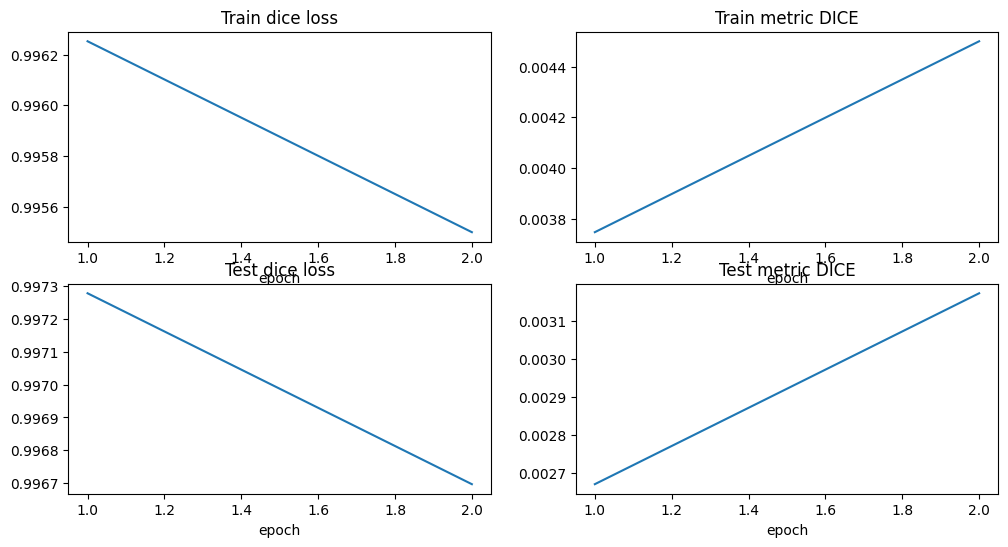

In [91]:
from utils.view import  plt_metrices

path = OUT_DIR
if (os.path.exists(path)):
    plt_metrices(path)

In [92]:
from monai.utils import first
from monai.transforms import(
    Activations,
)

import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [115]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm


model = UNet(
    spatial_dims=3,
    in_channels=4,
    out_channels=1,
    channels=( 64, 128, 256,512), 
    strides=(2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [116]:
import os.path

path = OUT_DIR+  "best_metric_model.pth"

if (os.path.exists(path)):
    model.load_state_dict(torch.load(
        os.path.join(path)))
# model.eval()

In [93]:
spatial_size = [128,128,16]

torch.Size([1, 4, 128, 128, 16])


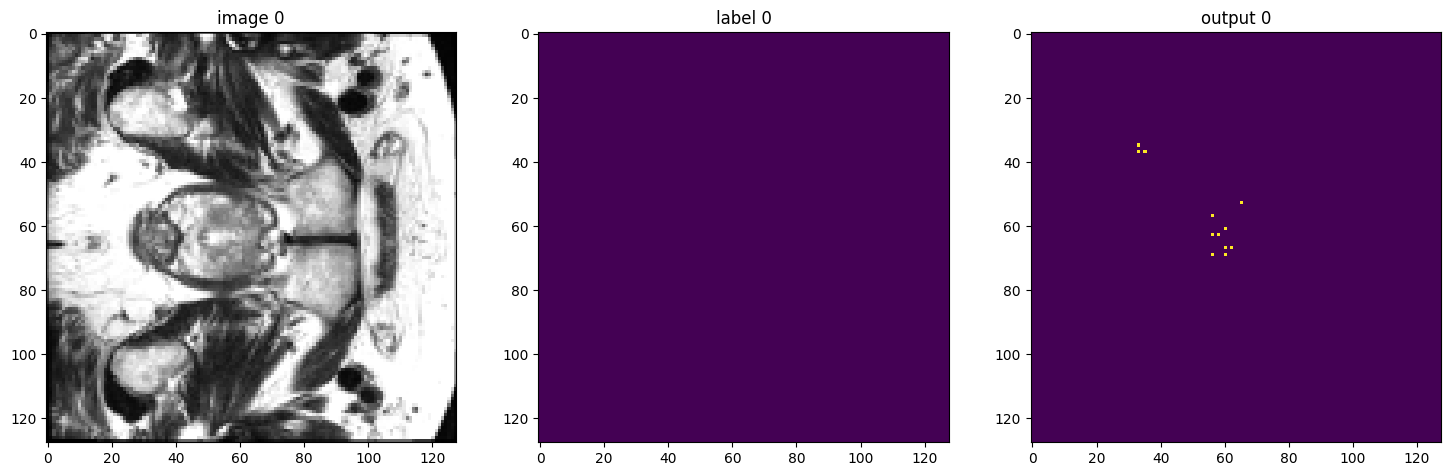

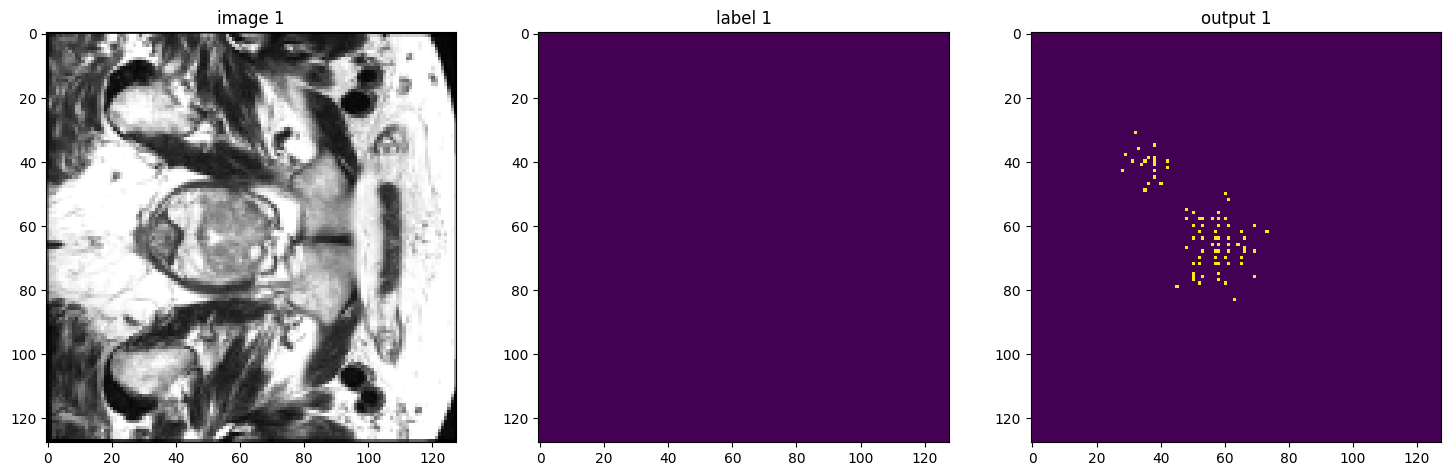

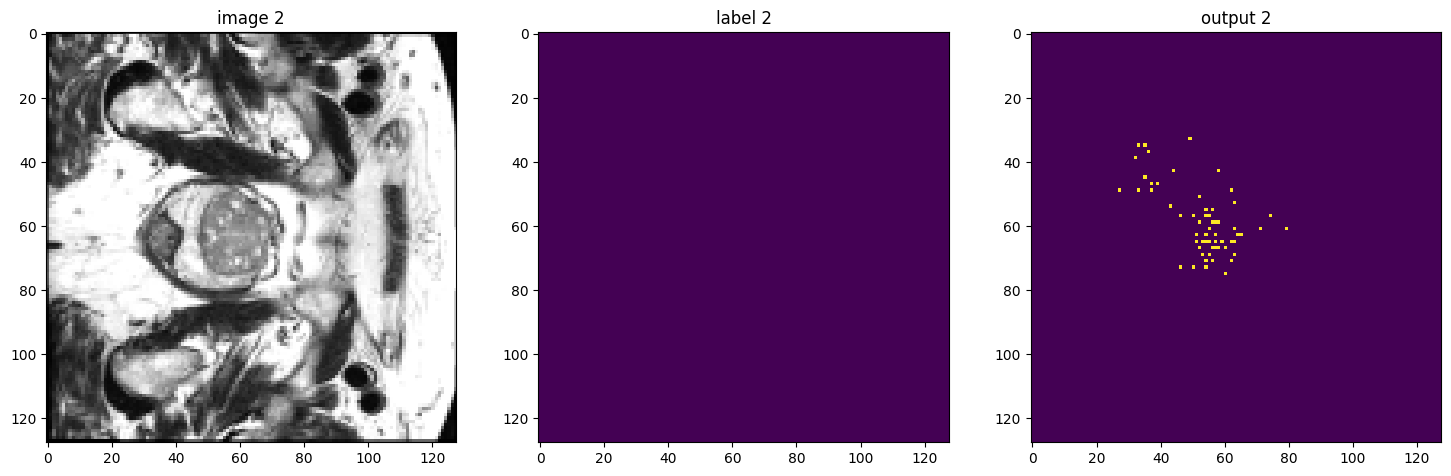

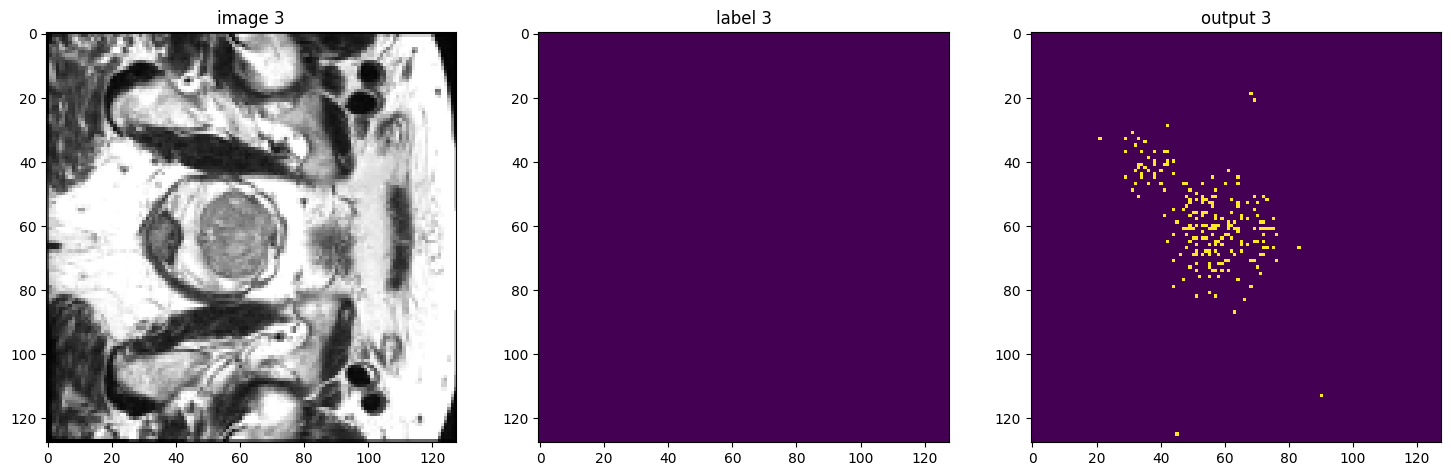

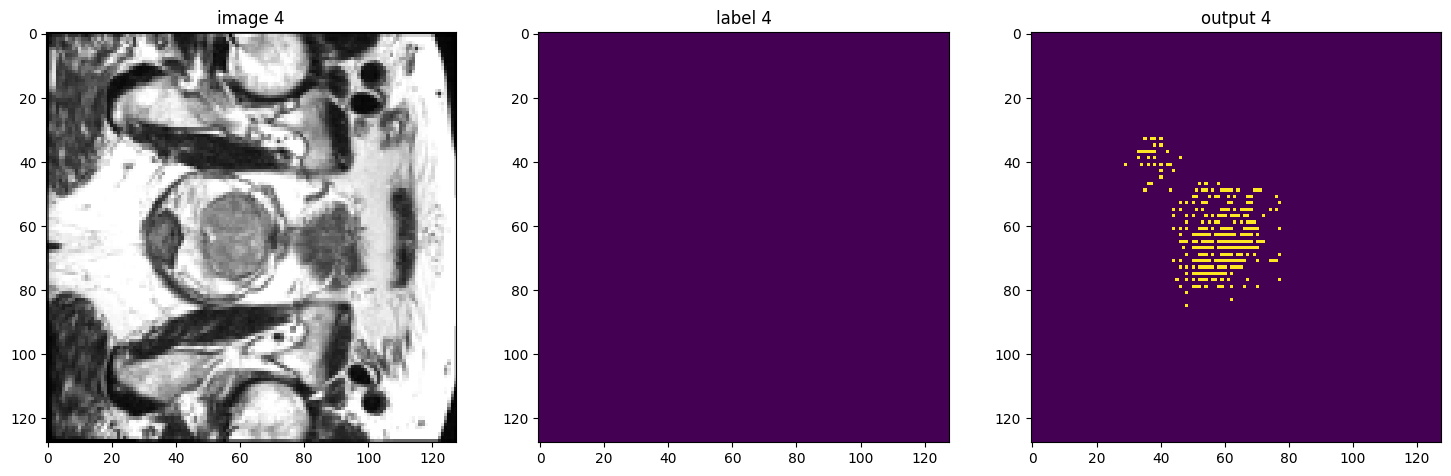

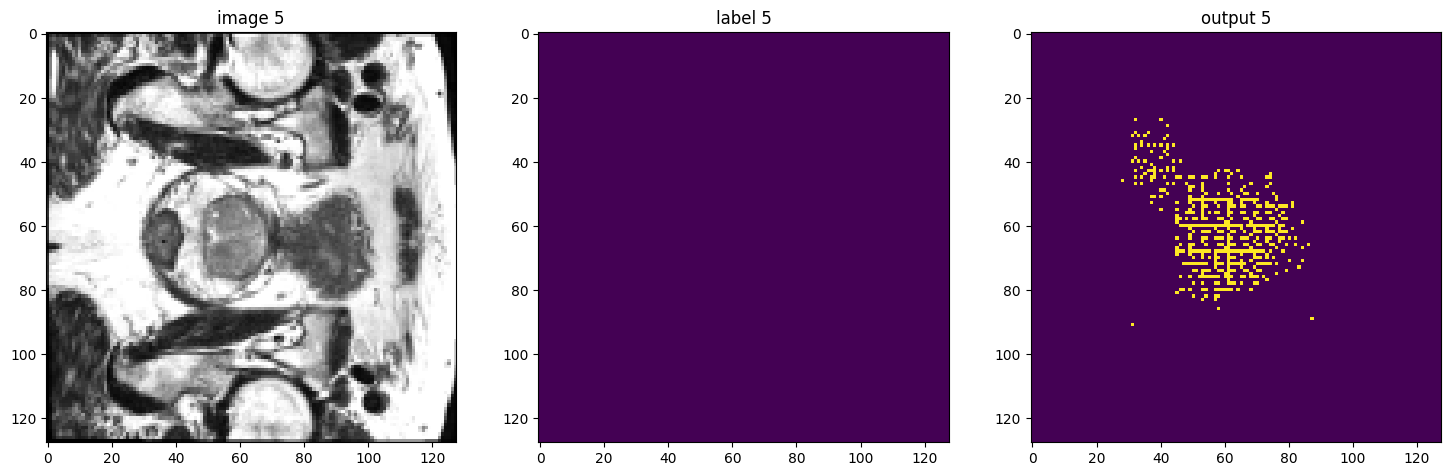

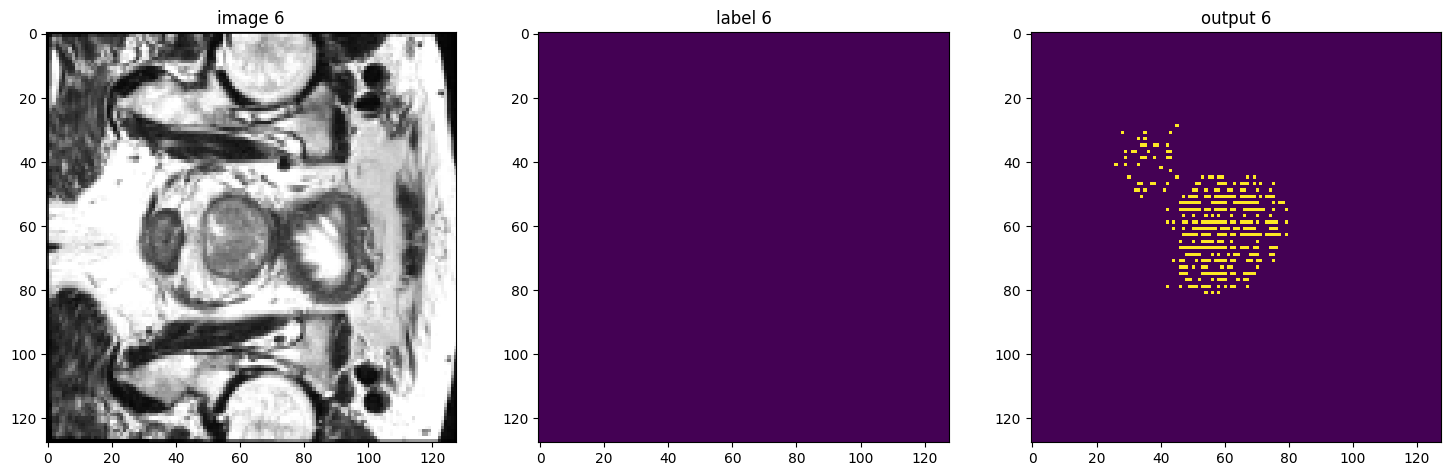

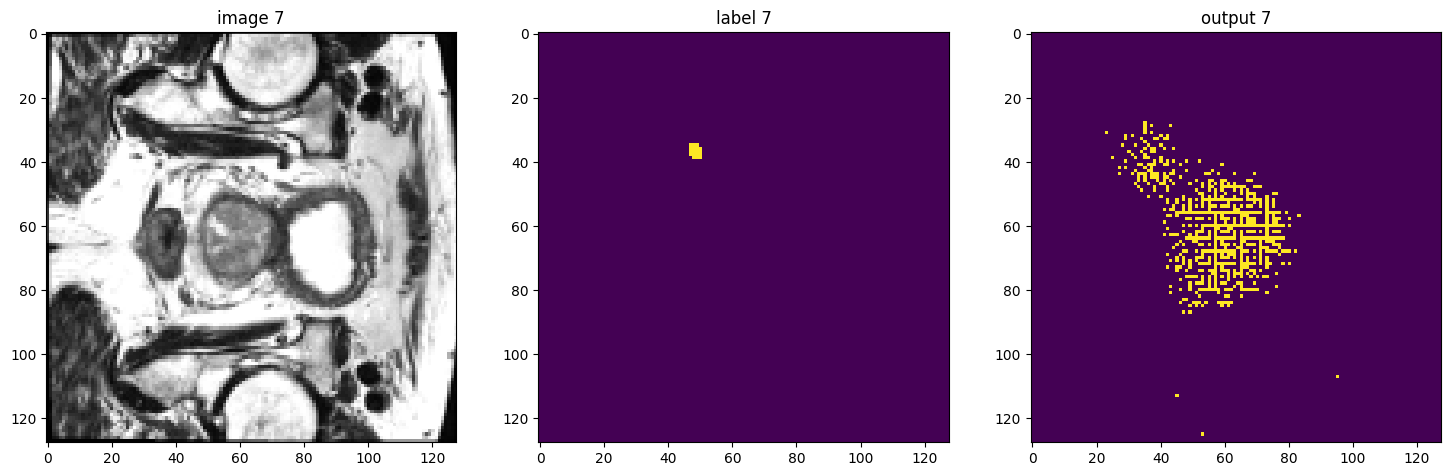

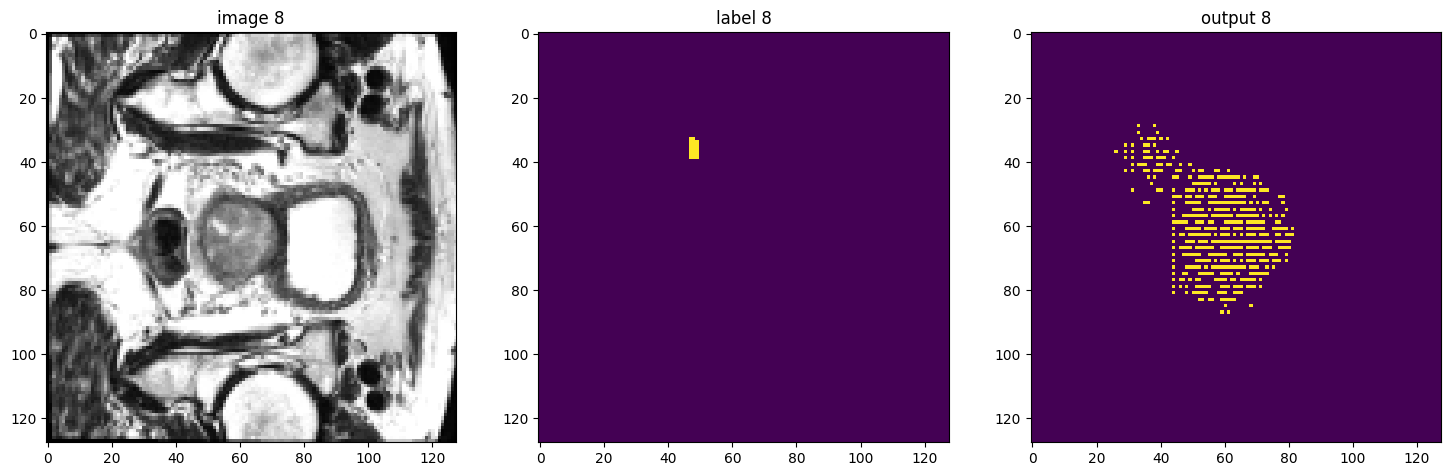

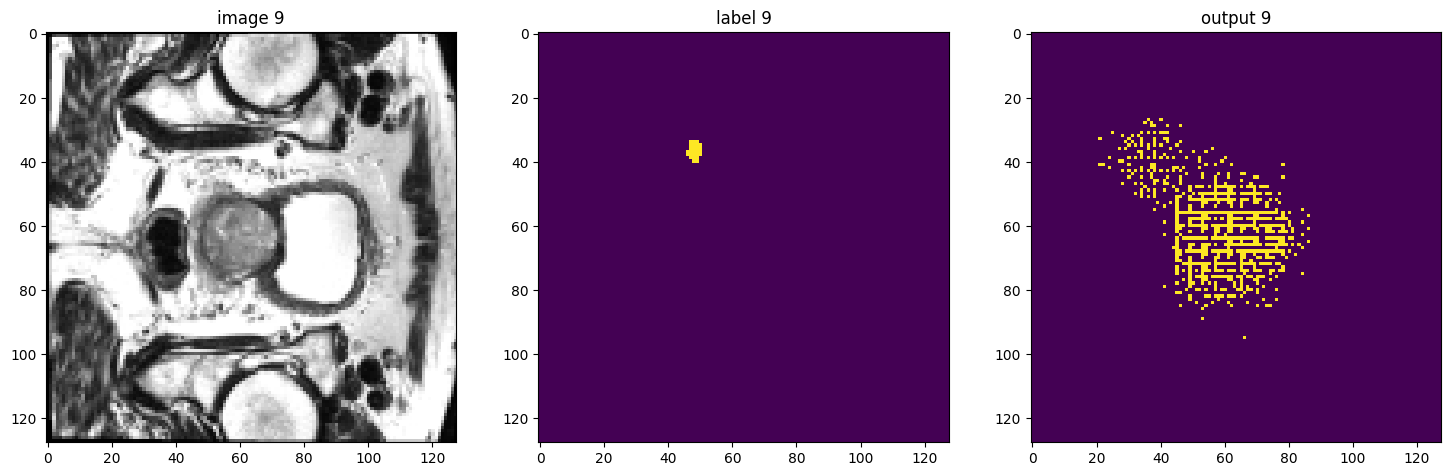

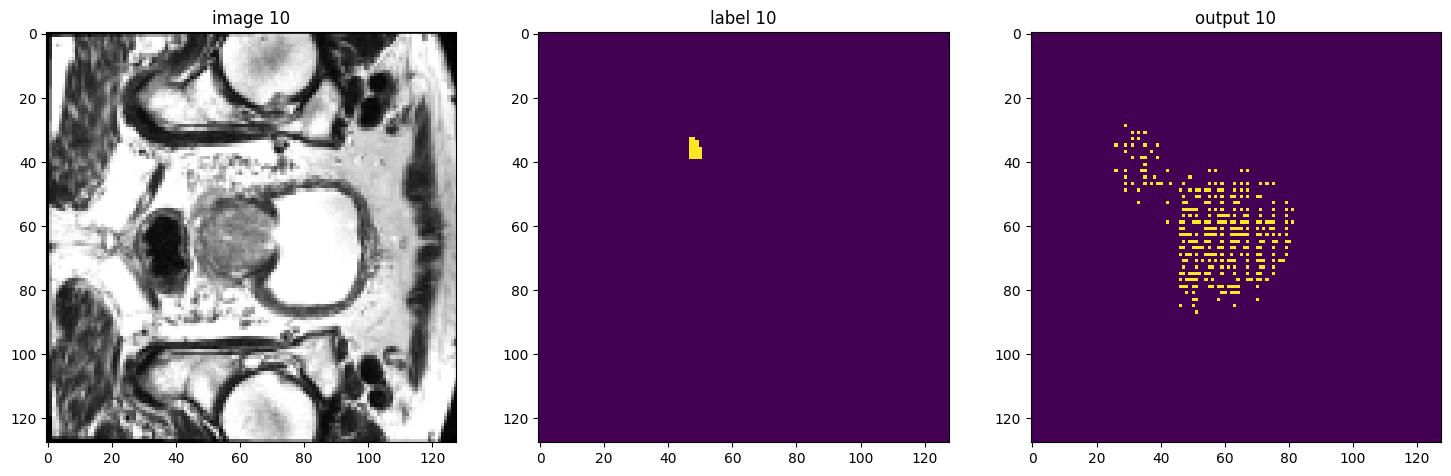

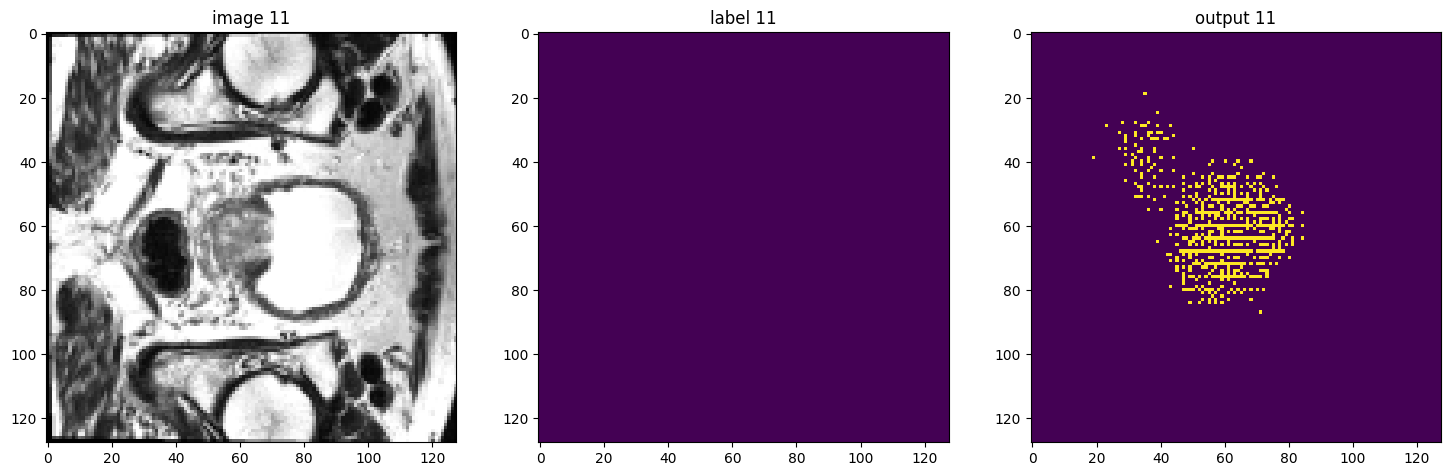

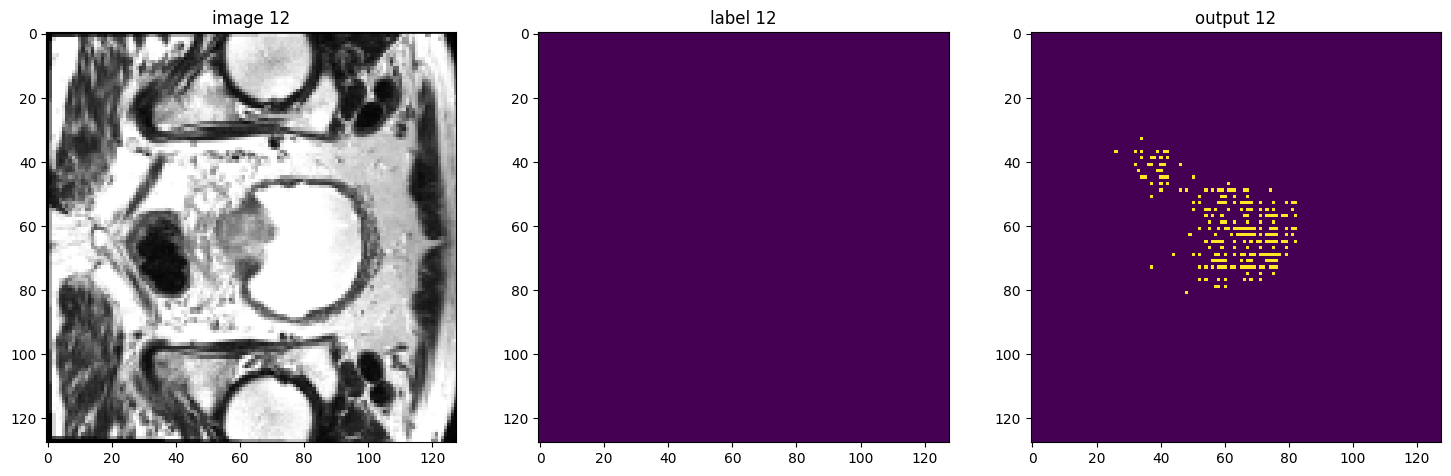

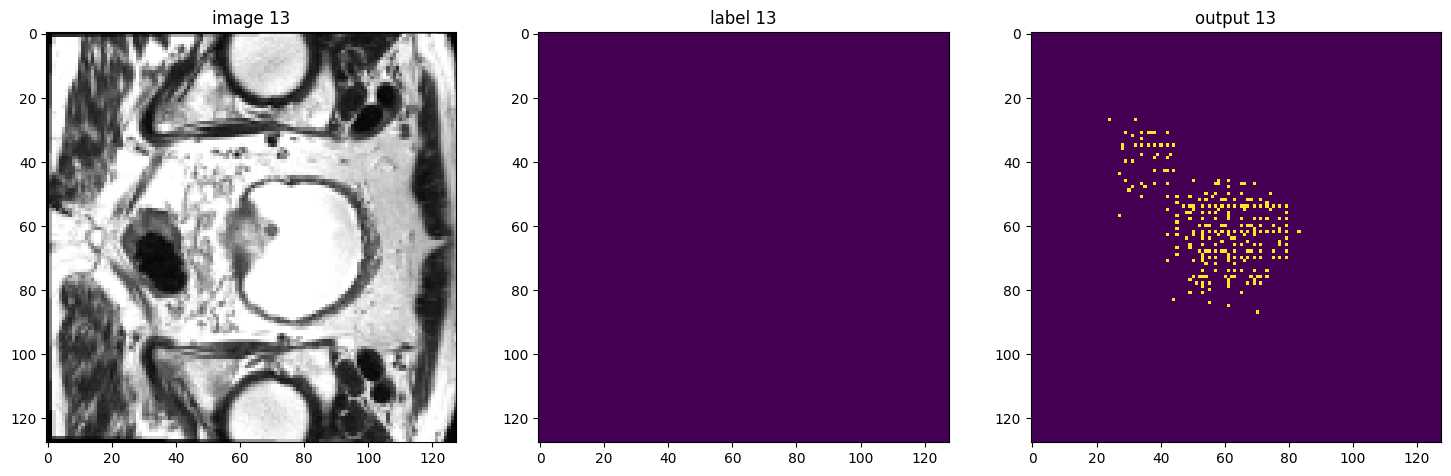

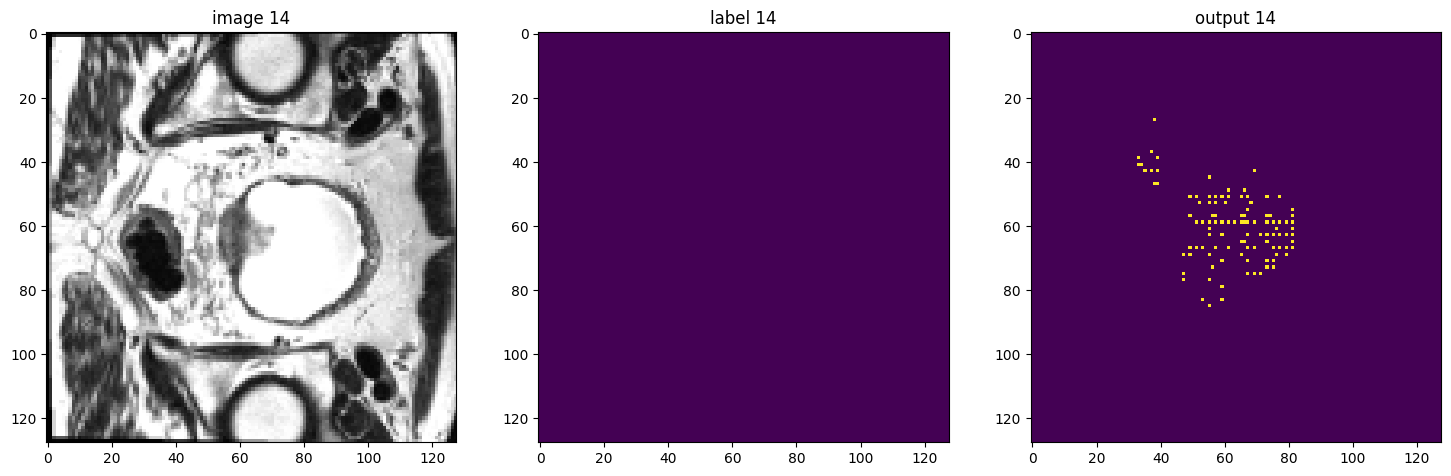

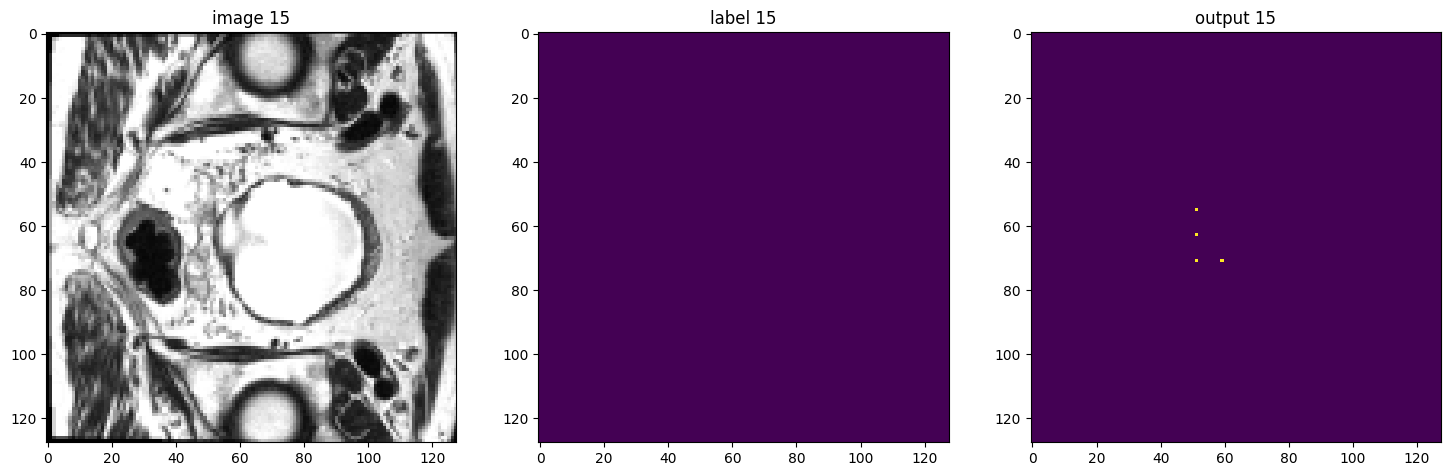

In [117]:
sw_batch_size = 4
roi_size = spatial_size
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['image']
    #t_segmentation = test_patient['seg']
    print(t_volume.shape)
    test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.8
        
    for i in range(spatial_size[2]):
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["image"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["label"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 0, :, :, i])
        plt.show()